In [18]:
import os
import sys
sys.path.append('../utils')
sys.path.append('../dataset0')
from data_loader import PeriodDataset
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

import types

%matplotlib inline

In [19]:
# from basic_model import BasicRNN as Model
# from gated_model import GatedRNN as Model
from gated_model import StackGatedRNN as Model

In [20]:
PATH = '../runs/unemployment/'
run = 'stack_soft_1'

In [21]:
loader = PeriodDataset.get_loader(batch_size=3, N=30, W=10)

Data build range: [window(1980-12-31 00:00:00) - 1983-12-31 00:00:00, 2012-12-31 00:00:00]


In [22]:
trainX, trainY = loader.dataset.get_io('1977-01-01', '2012-12-31')
testX, testY = loader.dataset.get_io('1977-01-01', '2017-12-31')

In [23]:
with torch.no_grad():
    test_period_input = to_gpu(testX)
    self_test_input = to_gpu(testX[:trainX.size()[0] + 1])

In [24]:
self_test_input.shape

torch.Size([36, 12])

In [26]:
model = to_gpu(Model(seq_dim=12, hidden_size=24))
model.load_state_dict(torch.load(os.path.join(PATH, run, 'snapshots27.pth')))

In [27]:
test_period_output = model.forecast(test_period_input)
self_test_output = model.self_forecast(self_test_input, 5)

In [28]:
self_test_output

tensor([[ 3.6598,  3.3997,  3.2779,  3.1661,  3.2170,  4.1176,  4.3399,
          4.2555,  3.8166,  3.4649,  3.3978,  3.2025],
        [ 3.6526,  3.3578,  3.2736,  3.1671,  3.1902,  4.1331,  4.3856,
          4.3262,  3.7845,  3.4556,  3.3403,  3.2384],
        [ 3.6985,  3.4378,  3.3070,  3.2251,  3.2527,  4.2019,  4.4735,
          4.3725,  3.8599,  3.5194,  3.4172,  3.2819],
        [ 3.8912,  3.6022,  3.4532,  3.4032,  3.4187,  4.4053,  4.6676,
          4.5708,  4.0568,  3.6853,  3.5891,  3.4391],
        [ 3.9144,  3.6180,  3.4717,  3.4223,  3.4355,  4.4262,  4.6878,
          4.5865,  4.0774,  3.7014,  3.6096,  3.4519],
        [ 3.9301,  3.6354,  3.4851,  3.4363,  3.4513,  4.4443,  4.7054,
          4.6058,  4.0950,  3.7149,  3.6253,  3.4645],
        [ 3.8892,  3.5972,  3.4524,  3.4007,  3.4197,  4.4002,  4.6546,
          4.5635,  4.0502,  3.6769,  3.5820,  3.4256],
        [ 3.7628,  3.4820,  3.3446,  3.2913,  3.2936,  4.2684,  4.5091,
          4.4422,  3.9148,  3.5684,  3.

In [29]:
self_test_output.shape

torch.Size([40, 12])

In [30]:
testY.shape

torch.Size([40, 12])

In [31]:
y_pred = torch.reshape(self_test_output.cpu(),(480,)).detach().numpy()
y = torch.reshape(testY,(480,)).numpy()

In [32]:
#开始画图

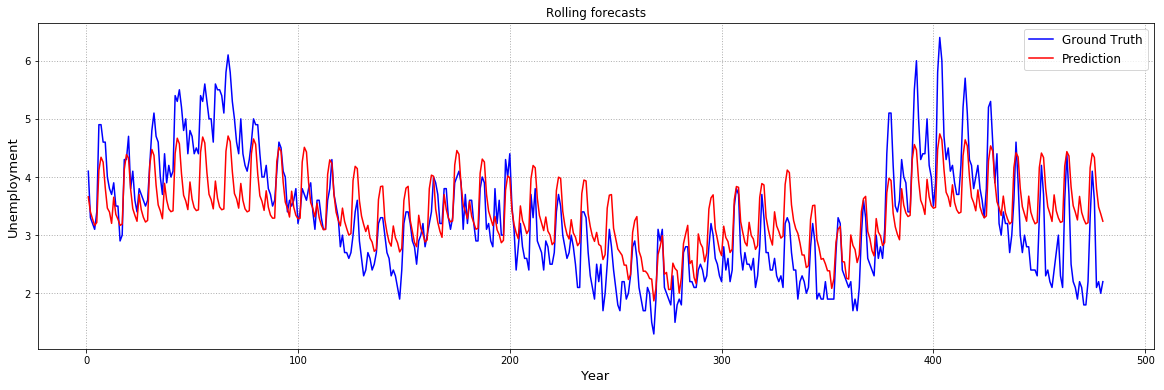

In [33]:
start_date = '1977-01-01'
x=np.linspace(1, 480, 480)
plt.figure(figsize=(20,6))
plt.plot(x, y, color='blue', label='Ground Truth')
plt.plot(x, y_pred, color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Rolling forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

In [34]:
y_pred = torch.reshape(test_period_output.cpu(),(480,)).detach().numpy()
y = torch.reshape(testY,(480,)).numpy()

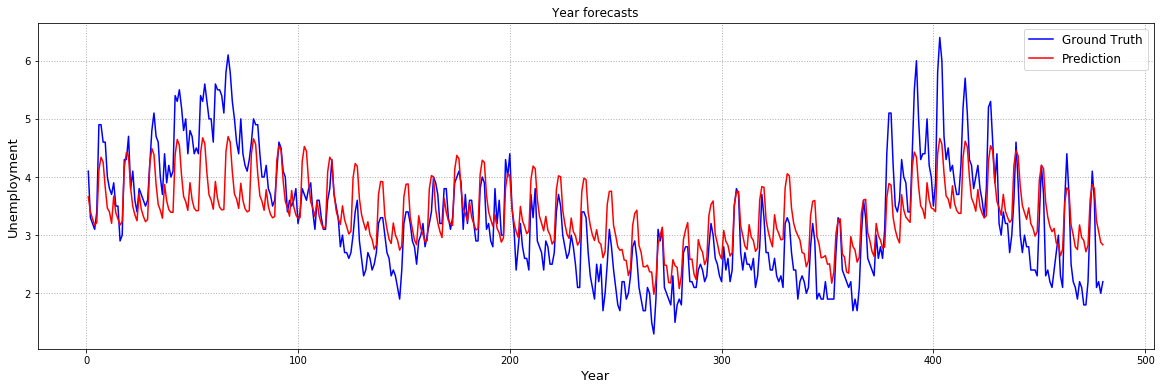

In [35]:
start_date = '1977-01-01'
x=np.linspace(1, 480, 480)
plt.figure(figsize=(20,6))
plt.plot(x, y, color='blue', label='Ground Truth')
plt.plot(x, y_pred, color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()